In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('historic_demand_year_2022.csv')

In [3]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 991.0 kB/s eta 0:02:06
   ---------------------------------------- 0.2/124.9 MB 1.8 MB/s eta 0:01:08
   ---------------------------------------- 0.3/124.9 MB 2.1 MB/s eta 0:00:59
   ---------------------------------------- 0.5/124.9 MB 3.0 MB/s eta 0:00:41
   ---------------------------------------- 0.9/124.9 MB 4.2 MB/s eta 0:00:30
   ---------------------------------------- 1.0/124.9 MB 4.3 MB/s eta 0:00:30
   ---------------------------------------- 1.0/124.9 MB 4.3 MB/s eta 0:00:30
   ---------------------------------------- 1.5/124.9 MB 4.3 MB/s eta 0:00:29
    --------------------------------------- 1.7/124.9 MB 4.7 MB/s eta 0:00:27
    --------------------------------------- 2.3/124.9 MB 5.4 MB/s eta 0:00:23
    --------------------------------------- 2.6/124.9 MB 5.8 MB/s eta 0:00:22
    --------------------------------------- 2.9/124.9 MB 5.9 MB/s eta


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
X = data.iloc[1000:1200, 2:10]
Y = data.iloc[1000:1200, 10]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [47]:
import xgboost as xgb

In [48]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=3)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred))

53520.668521463245
0.7984862043281462


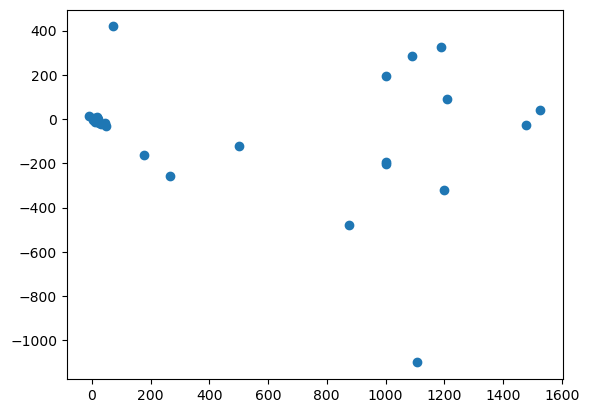

In [52]:
import matplotlib.pyplot as plt
diff = Y_test - y_pred
plt.scatter(y_pred, diff)